/var/folders/gs/m07fg43n6w55tf0qyzsqrh6h0000gn/T/ipykernel_21203/2615844882.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


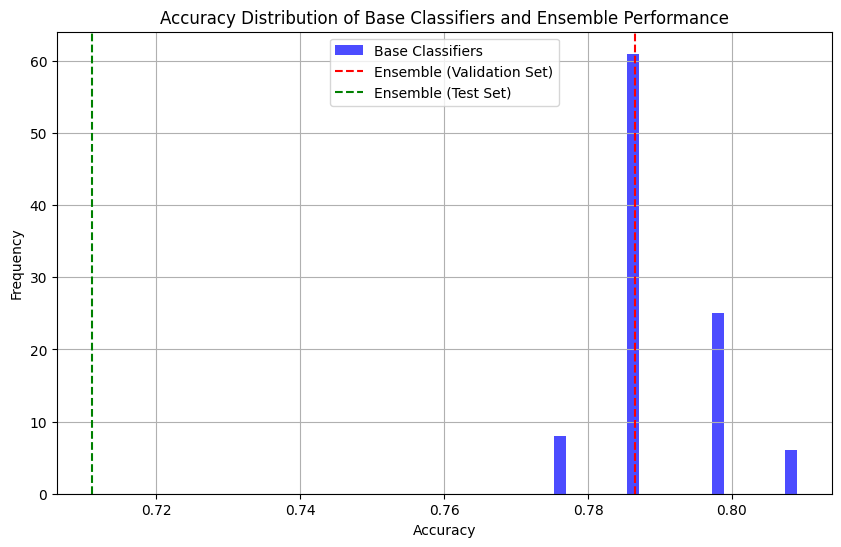

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv("Q5.csv")

X = data.drop(columns=['Survived'])
y = data['Survived']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123123)

base_models = []
for i in range(100):
    clf = DecisionTreeClassifier(random_state=i)
    clf.fit(X_train, y_train)
    base_models.append(clf)

base_accuracies = []
for clf in base_models:
    y_val_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    base_accuracies.append(accuracy)

ensemble_predictions = np.array([clf.predict(X_val) for clf in base_models])
ensemble_predictions = np.mean(ensemble_predictions, axis=0) > 0.5

ensemble_accuracy_val = accuracy_score(y_val, ensemble_predictions)

ensemble_predictions_test = np.array([clf.predict(X_test) for clf in base_models])
ensemble_predictions_test = np.mean(ensemble_predictions_test, axis=0) > 0.5  # Voting based on majority
ensemble_accuracy_test = accuracy_score(y_test, ensemble_predictions_test)

# Plot histogram of base classifiers' accuracies and ensemble classifier's performance
plt.figure(figsize=(10, 6))
plt.hist(base_accuracies, bins=20, alpha=0.7, color='blue', label='Base Classifiers')
plt.axvline(x=ensemble_accuracy_val, color='red', linestyle='--', label='Ensemble (Validation Set)')
plt.axvline(x=ensemble_accuracy_test, color='green', linestyle='--', label='Ensemble (Test Set)')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy Distribution of Base Classifiers and Ensemble Performance')
plt.legend()
plt.grid(True)
plt.show()
